In [2]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [4]:
# depth of this file in the project
file_depth = '../..'

with open(file_depth + '/config/data_25m_config.json') as config_file:
    config = json.load(config_file)

original_csv_ratings_data_path = config['original_csv_ratings_data']
ratings = pd.read_csv(file_depth + original_csv_ratings_data_path, encoding="UTF-8")
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


### Number of ratings made in each year

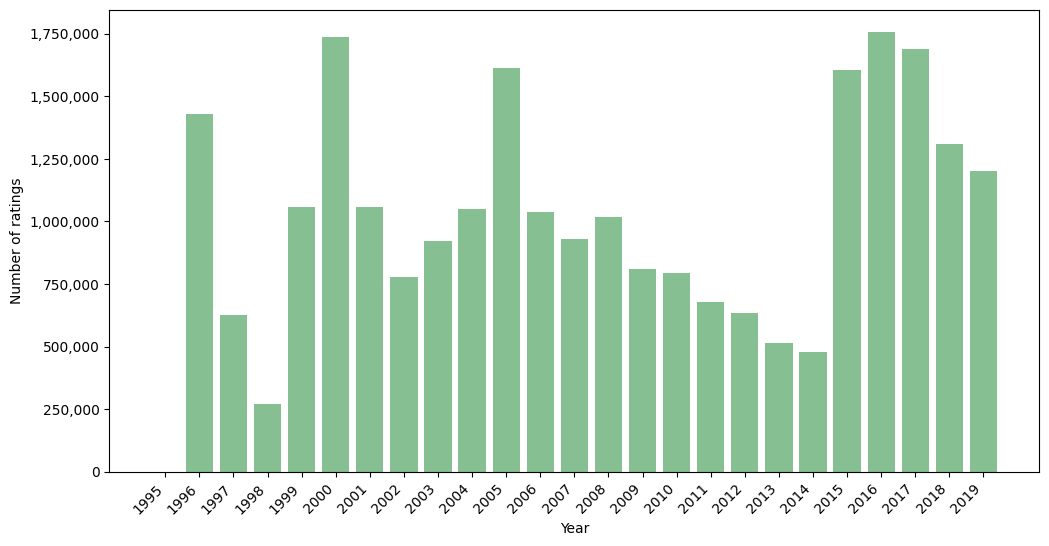

In [6]:
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['formatted_date'] = ratings['date'].dt.normalize()

ratings['year'] = ratings['date'].dt.year

ratings.drop(columns=['date'], inplace=True)
ratings.rename(columns={'formatted_date': 'date'}, inplace=True)

yearly_ratings = ratings.groupby('year').agg(rating_count=('userId', 'size'), unique_users=('userId', 'nunique')).reset_index()

plt.figure(figsize=(12, 6))
ax = plt.gca()
plt.bar(yearly_ratings['year'].astype(str), yearly_ratings['rating_count'], color='#86bf91')
plt.xlabel('Year')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45, ha='right')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

ratings.drop(columns=['date', 'year'], inplace=True)

### Number of ratings for each user

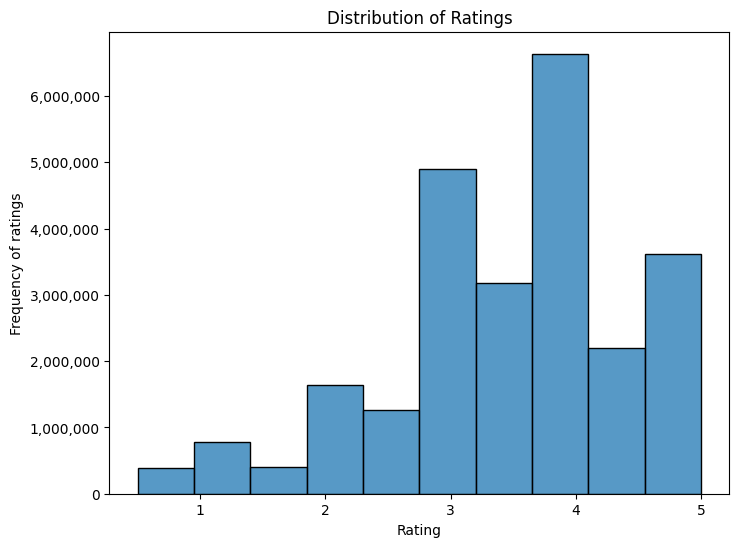

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(ratings['rating'], bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency of ratings')

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

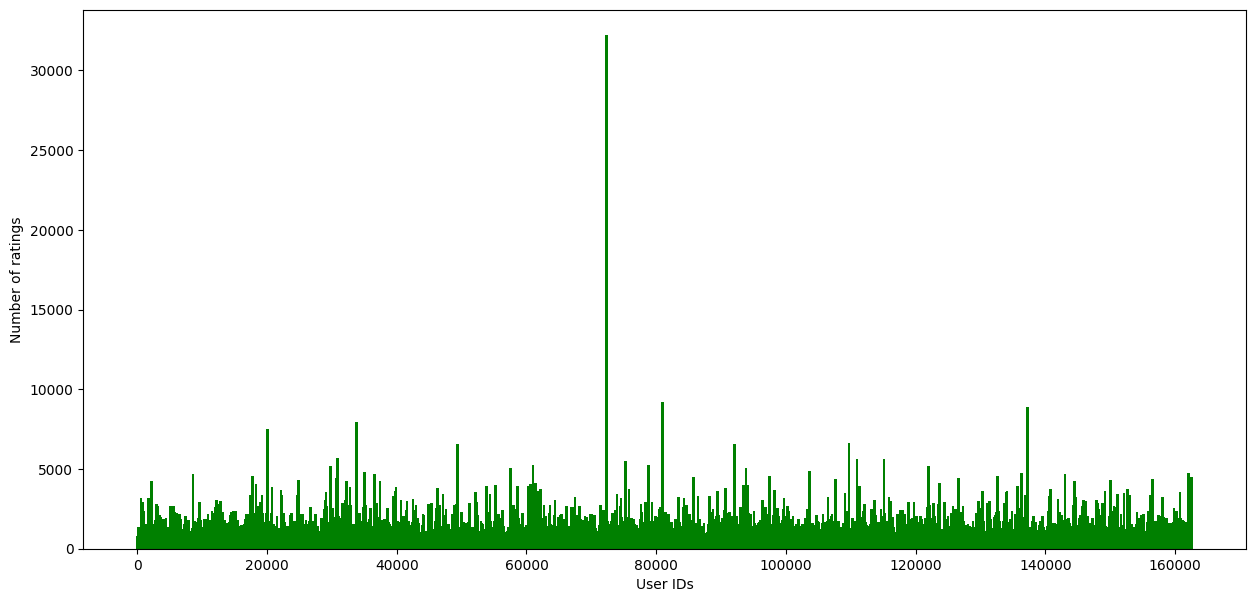

In [37]:
user_rating_counts = ratings['userId'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
plt.bar(user_rating_counts.index, user_rating_counts.values, color='green', width=400)
plt.xlabel('User IDs')
plt.ylabel('Number of ratings')
plt.show()

### Data sparcity for rated movies by users

In [7]:
total_users = ratings['userId'].nunique()
total_movies = ratings['movieId'].nunique()
total_possible_ratings = total_users * total_movies
actual_ratings = len(ratings)
sparsity = 1 - (actual_ratings / total_possible_ratings)

print("Data sparsity:", sparsity)

Data sparsity: 0.9973951609474271
